# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

In [2]:

df = pd.read_csv('D:/DataScienceFoundation/SpringBoard/miniProject/Analyze Human Body Temperature Using EDA/1520467485_dsc_human_temp/EDA_human_temperature/data/human_body_temperature.csv')

In [3]:
# Your work here.

df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


### 1. Is the distribution of body temperatures normal? 

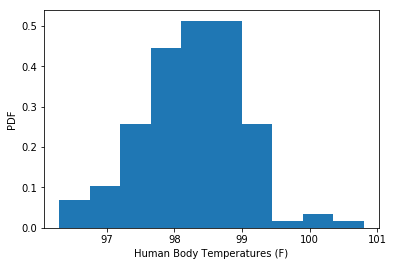

In [4]:


temps = np.array(df['temperature'])
mean, std = np.mean(temps), np.std(temps)
len_temps = len(temps)

plt.hist(temps, normed = True)
plt.xlabel('Human Body Temperatures (F)')
plt.ylabel('PDF')

plt.show()

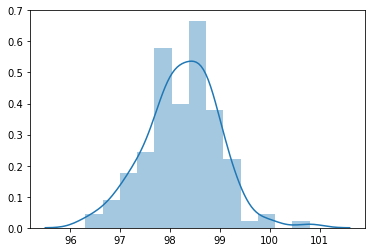

In [5]:
ax = sns.distplot(temps)

In [6]:
from scipy.stats import normaltest
statistic, p_val = normaltest(temps)

print('chi-square statistic:',statistic)
print('p value =',p_val)

chi-square statistic: 2.70380143332
p value = 0.258747986349


In [7]:
alpha = 0.05
if p_val < alpha:
    print("p_value < alpha - hypothesis test can be rejected")
else:
    print("p_value > alpha - hypothesis test cannot be rejected")

p_value > alpha - hypothesis test cannot be rejected


### The distribution seems to be normal: p-value = 0.259

### 2. Is the sample size large? Are the observations independent?

In [8]:
if len(df) < 30:
    print("The sample size is small, n < 30, we cannot assume observations are independent ")
else:
    print("The sample size is large, n > 30, we can assume observations are independent")

The sample size is large, n > 30, we can assume observations are independent


### 3. Is the true population mean really 98.6 degrees F?

- First, try a bootstrap hypothesis test.
- Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
- In this situation, is it appropriate to use the tt or zz statistic?
- Now try using the other test. How is the result be different? Why? 

### First, try a bootstrap hypothesis test.

#### Null Hypothosis: population mean is 98.6 degrees F

#### Alternate Hypothosis: population mean is not 98.6 degrees F

In [9]:
mean_data = np.mean(df['temperature'])
mean_data

98.24923076923078

In [10]:
#Is the true population mean really 98.6?

mean_diff = mean_data - 98.6
mean_diff


-0.35076923076921673

In [11]:
df['shifted_temperature'] = df['temperature'] - mean_data + 98.6

In [12]:
def diff_from_hypo(data, temperature = 98.6):
    return np.mean(data) - 98.6

def bootstrap_replicate_1d(data, func):
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

def draw_bs_reps(data, func, size=1):
    # Initialize array of replicates:
    bs_replicates = np.empty(size)

    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates


bs_replicates = draw_bs_reps(df['shifted_temperature'], diff_from_hypo, 10000)
p_value = np.sum(bs_replicates <= mean_diff) / len(bs_replicates)
p_value

0.0

### Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?

#### Becuase we have a list of temperature data and a population mean, we can use one sample test. 


### In this situation, is it appropriate to use the tt or zz statistic?

#### Since there are 130 sample and we can calculate the standard deviation, Z-score can be used.

### Now try using the other test. How is the result be different? Why? 

#### Z-Test:

In [13]:
from statsmodels.stats.weightstats import ztest

ztest(x1 = df['temperature'], value = 98.6)

(-5.4548232923645195, 4.9021570141012155e-08)

#### T-Test:

In [14]:
from scipy.stats import ttest_1samp

ttest_1samp(df['temperature'], 98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

#### p value of all tests are very small. We can reject the null hypothesis

### 4. Draw a small sample of size 10 from the data and repeat both frequentist tests.
- Which one is the correct one to use?
- What do you notice? What does this tell you about the difference in application of the tt and zz statistic? 

In [15]:
sample = np.random.choice(df['temperature'], 10)

#### boostrtap test 

In [16]:
diff_val = diff_from_hypo(sample)
sample_shifted = sample - np.mean(sample) + 98.6
bs_replicates = draw_bs_reps(sample_shifted, diff_from_hypo, 10000)
p_value = np.sum(bs_replicates <= diff_val) / len(bs_replicates)
p_value

0.2079

#### Z-Test

In [17]:
ztest(sample, value = 98.6)

(-0.78744759637698669, 0.43101989357181558)

#### T-Test

In [18]:
ttest_1samp(sample, 98.6)

Ttest_1sampResult(statistic=-0.7874475963769868, pvalue=0.45125858192278601)

#### Becuase sample size is below 30, T test is correct.

### 5. At what temperature should we consider someone's temperature to be "abnormal"?
- As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
- Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws. 

In [19]:
bs_replicates = draw_bs_reps(df['temperature'], np.mean, 10000)
conf_int = np.percentile(bs_replicates, [0.05, 99.95])
conf_int

array([ 98.02153731,  98.46692346])

In [20]:
from scipy.stats import norm
import math

z_value = 1.96
mean = np.mean(df['temperature'])
std = np.std(df['temperature'])
std_err = std / math.sqrt(len(df['temperature']))
#margin_err = z_value * std_err
margin_err = (conf_int[1]-conf_int[0])*0.5
#conf_int = (mean - margin_err, mean + margin_err)
#conf_int

print('Margin of Error (Bootstrap Method) = %.3f' %margin_err)
print('99.9%% Confidence interval of an Individuals Temperature (Bootstrap Method) = [%.2f, %.2f]' %(conf_int[0], conf_int[1]))

Margin of Error (Bootstrap Method) = 0.223
99.9% Confidence interval of an Individuals Temperature (Bootstrap Method) = [98.02, 98.47]


#### 95% confidence interval is in range of 98.124 and 98.374 and if the temperature is outside of this range then is abnormal.

### Is there a significant difference between males and females in normal temperature?
- What testing approach did you use and why?

In [21]:
male_df = df[df.gender == 'M']['temperature']
female_df = df[df.gender == 'F']['temperature']

In [22]:
print(male_df.describe())
print(female_df.describe())

count    65.000000
mean     98.104615
std       0.698756
min      96.300000
25%      97.600000
50%      98.100000
75%      98.600000
max      99.500000
Name: temperature, dtype: float64
count     65.000000
mean      98.393846
std        0.743488
min       96.400000
25%       98.000000
50%       98.400000
75%       98.800000
max      100.800000
Name: temperature, dtype: float64


#### We can use two-sample test of the difference in means. 
#### The null hypothesis is that the average temperature for males and females are the same.

In [25]:
import scipy.stats as stats

In [26]:
male_count = len(male_df)
female_count = len(female_df)
diff = male_df.mean() - female_df.mean()
std = np.sqrt(male_df.var()/male_count + female_df.var()/female_count)

t_stat_d = (diff - 0)/std
p_value_d = stats.t.sf(np.abs(t_stat_d), male_count+female_count-2)*2
print("The t-statistic is {:1.3f} and the p-value is {:1.7f}".format(t_stat_d, p_value_d))

The t-statistic is -2.285 and the p-value is 0.0239319


#### The p_value is less than alpha= 0.05 so we can reject the null hypothesis which claims the average temperature for meles and females are same

### Conclusion
- Body temperatures are normally distributed.
- True population mean is not 98.6 F. with 95% confidence interval, body temperature is between 98.123 F and 98.374 F.
- There is difference between males and females in temperature.

